In [1]:
%matplotlib notebook
import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_full = pds.read_csv("df3dimv5.csv")
df = df_full.loc[df_full['code'] > 0]

x1 = df['dim1']
y1 = df['dim2']
z1 = df['dim3']
code = df['code']

<IPython.core.display.Javascript object>


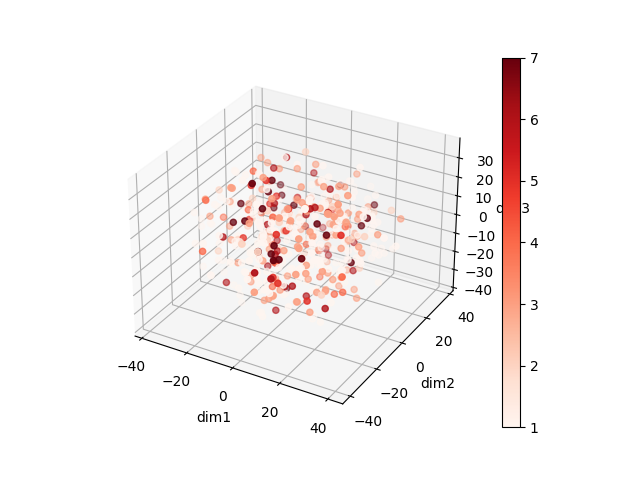

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x1, y1, z1, c=code, cmap='Reds')
ax.set_xlabel('dim1')
ax.set_ylabel('dim2')
ax.set_zlabel('dim3')
plt.colorbar(p)
plt.show()

<IPython.core.display.Javascript object>


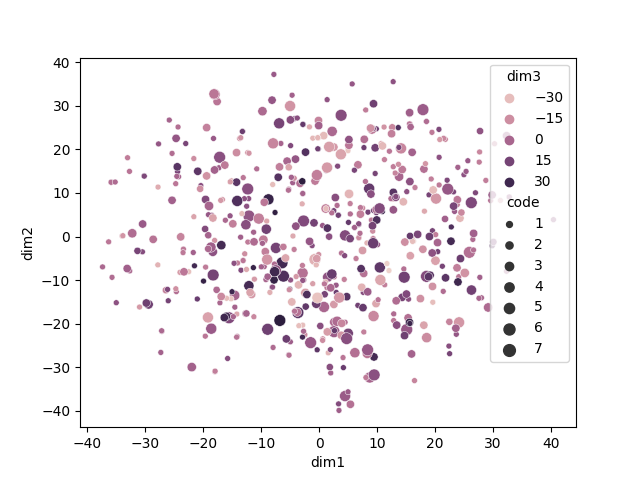

In [4]:
fig = plt.figure()
sns.scatterplot(data=df, x='dim1', y='dim2', hue='dim3', size='code')
plt.show()

In [38]:
from sklearn.cluster import DBSCAN

dims_array = df_full[['dim1', 'dim2', 'dim3']].to_numpy()

clustering = DBSCAN(eps=1.5, min_samples=5).fit(dims_array)

In [39]:
print(clustering.labels_)

[   0    0    1 ... 1578   -1   -1]


<IPython.core.display.Javascript object>


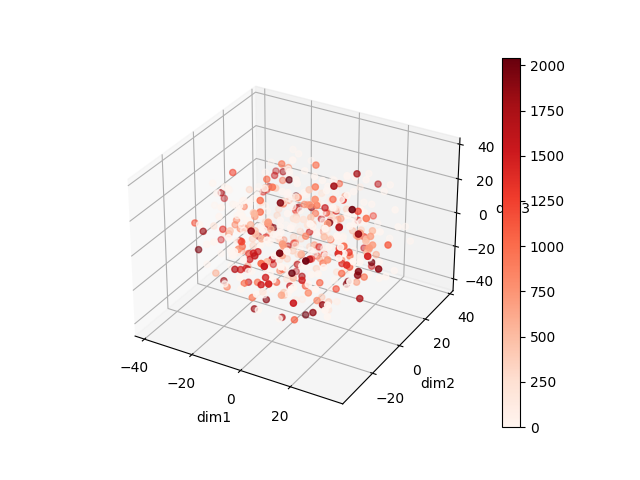

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

step = 64

p = ax.scatter(
    dims_array[::step,0], 
    dims_array[::step,1], 
    dims_array[::step,2], 
    c=clustering.labels_[::step], 
    cmap='Reds'
)
ax.set_xlabel('dim1')
ax.set_ylabel('dim2')
ax.set_zlabel('dim3')
plt.colorbar(p)
plt.show()

In [41]:
df_full['Cluster'] = clustering.labels_
df_full

,Unnamed: 0,paths,dim1,dim2,dim3,code,Cluster
0,0,/media/matt/4TBInternal/zzFootball/1s/20161022...,3.171731,16.130247,11.083091,1.0,0
1,1,/media/matt/4TBInternal/zzFootball/1s/20161022...,3.170848,16.129942,11.082788,0.0,0
2,2,/media/matt/4TBInternal/zzFootball/1s/20161022...,-13.082580,-18.569200,-2.500476,0.0,1
3,3,/media/matt/4TBInternal/zzFootball/1s/20161022...,3.162690,16.120170,11.065245,0.0,0
4,4,/media/matt/4TBInternal/zzFootball/1s/20161022...,3.067566,16.135948,11.173009,0.0,0
...,...,...,...,...,...,...,...
31483,31483,/media/matt/4TBInternal/zzFootball/20161125_MU...,3.019868,-6.981023,-26.125816,0.0,1027
31484,31484,/media/matt/4TBInternal/zzFootball/20161125_MU...,-6.050324,9.048628,-7.985569,0.0,-1
31485,31485,/media/matt/4TBInternal/zzFootball/20161125_MU...,11.013716,6.166941,-0.902589,0.0,1578
31486,31486,/media/matt/4TBInternal/zzFootball/20161125_MU...,-7.002407,1.926887,-11.628428,0.0,-1


In [42]:
df_full.to_csv("df3dimv5.csv")